# Imports

In [1]:
%load_ext autoreload
%autoreload 2
    
import os
import sys
from typing import (
    Any,
    Dict,
    List
)

import numpy as np
from numpy import ndarray

import pandas as pd
from pandas import DataFrame

from sklearn.model_selection import (
    GridSearchCV,   
    LeaveOneOut,
    train_test_split
)
from sklearn.linear_model import Ridge

# Constants

In [2]:
DATA: str = "data"
DATASET_NAME: str = "2023-10-13-corrosion_inhibition_dataset_gp.csv"

# Paths

In [3]:
# Main Path
main_path: str = os.path.dirname(os.getcwd())

# Place the main path on python path if not already there
if main_path not in sys.path:
    sys.path.insert(0, main_path)

# Data Path
data_path: str = os.path.join(main_path, DATA)

In [4]:
display(main_path)
display(data_path)

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR'

'C:\\Users\\petar\\PycharmProjects\\CorrosionInhibitorsQSPR\\data'

# Corrosion package imports

In [5]:
%load_ext autoreload
%autoreload 2
    
from corrosion.analysis import Analyzer
from corrosion.applicability_domain import ApplicabilityDomain
from corrosion.enums import MetricType
from corrosion.metrics import Metrics
from corrosion.regressors import (
    get_pca_ridge_model,
    PcaRidge
)
from corrosion.visuals import CorrosionVisualizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

In [6]:
# Load Data
dataset_path: str = os.path.join(data_path, DATASET_NAME)
data_df: DataFrame = pd.read_csv(dataset_path)

In [7]:
display(data_df)

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE)
0,gp_0001,4-dimethylaminopyridine,CN(C)c1ccncc1,0.410,1.786009,4.959540,103.5460,-5.129070,-1.136340,3.992730,...,4.127302,0.386300,0.409787,-0.47403,0.86,321.40,213.42,125.37,-2.663340,0.069715
1,gp_0002,"2,4,6-trimethylpyridine",Cc1cc(C)nc(C)c1,0.210,1.583658,1.978380,106.4510,-5.683370,-1.562200,4.121170,...,5.003569,0.439944,0.245983,-0.47866,1.53,377.30,226.52,129.41,-2.561180,0.077214
2,gp_0003,"2,6-dimethylpyridine",Cc1cccc(C)n1,0.133,1.421263,1.452400,91.8567,-5.753850,-1.706150,4.047700,...,3.640641,0.089218,0.332872,-0.47357,1.02,333.10,193.85,112.57,-2.522240,0.080280
3,gp_0004,4-methoxypyridine,COc1ccncc1,0.144,1.450566,3.438520,82.8424,-5.889900,-1.492000,4.397900,...,4.317681,0.090149,0.219337,-0.45851,0.60,303.79,175.45,104.77,-2.251314,0.105261
4,gp_0005,4-methylpyridine,Cc1ccncc1,0.119,1.379620,2.879190,77.0511,-5.871940,-1.744520,4.127420,...,4.807637,0.415376,0.272011,-0.44142,1.27,281.94,160.69,95.82,-2.588964,0.075098
5,gp_0006,2-methylpyridine,Cc1ccccn1,0.091,1.276551,1.902840,77.3130,-5.851810,-1.803020,4.048790,...,4.730089,0.406904,0.283282,-0.45247,0.89,287.86,160.89,95.78,-2.540394,0.078835
6,gp_0007,4-benzylpyridine,C(c1ccccc1)c2ccncc2,0.552,1.857005,2.805070,146.6650,-5.865410,-1.809550,4.055860,...,4.559530,0.473816,0.347983,-0.44029,2.85,369.73,266.54,167.93,-2.723490,0.065645
7,gp_0008,3-methylpyridine,Cc1cccnc1,0.068,1.161168,2.618710,76.8446,-5.847720,-1.838130,4.009590,...,4.263451,0.181243,0.271513,-0.43219,1.27,281.70,160.78,95.82,-2.550077,0.078076
8,gp_0010,pyridine,c1ccncc1,0.059,1.103902,2.326140,62.7542,-5.960920,-1.910780,4.050140,...,4.884148,0.414102,0.257745,-0.43496,0.76,245.60,127.94,78.98,-2.559219,0.077365
9,gp_0012,3-hydroxypyridine,Oc1cccnc1,0.103,1.324570,3.593400,69.3699,-5.950860,-1.901800,4.049060,...,4.888102,0.157439,0.172388,-0.41988,0.45,250.06,138.98,87.20,-2.511002,0.081187


In [8]:
data_pyridines_df: DataFrame = data_df[~data_df.Name.str.contains("quinoline")].reset_index(drop=True)

In [9]:
data_pyridines_df

,ID,Name,SMILES,Inhibitor Efficiency,NEW Inhibitor Efficiency,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,...,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume,PAE,EXP(PAE)
0,gp_0001,4-dimethylaminopyridine,CN(C)c1ccncc1,0.410,1.786009,4.959540,103.5460,-5.129070,-1.136340,3.992730,...,4.127302,0.386300,0.409787,-0.47403,0.86,321.40,213.42,125.37,-2.663340,0.069715
1,gp_0002,"2,4,6-trimethylpyridine",Cc1cc(C)nc(C)c1,0.210,1.583658,1.978380,106.4510,-5.683370,-1.562200,4.121170,...,5.003569,0.439944,0.245983,-0.47866,1.53,377.30,226.52,129.41,-2.561180,0.077214
2,gp_0003,"2,6-dimethylpyridine",Cc1cccc(C)n1,0.133,1.421263,1.452400,91.8567,-5.753850,-1.706150,4.047700,...,3.640641,0.089218,0.332872,-0.47357,1.02,333.10,193.85,112.57,-2.522240,0.080280
3,gp_0004,4-methoxypyridine,COc1ccncc1,0.144,1.450566,3.438520,82.8424,-5.889900,-1.492000,4.397900,...,4.317681,0.090149,0.219337,-0.45851,0.60,303.79,175.45,104.77,-2.251314,0.105261
4,gp_0005,4-methylpyridine,Cc1ccncc1,0.119,1.379620,2.879190,77.0511,-5.871940,-1.744520,4.127420,...,4.807637,0.415376,0.272011,-0.44142,1.27,281.94,160.69,95.82,-2.588964,0.075098
5,gp_0006,2-methylpyridine,Cc1ccccn1,0.091,1.276551,1.902840,77.3130,-5.851810,-1.803020,4.048790,...,4.730089,0.406904,0.283282,-0.45247,0.89,287.86,160.89,95.78,-2.540394,0.078835
6,gp_0007,4-benzylpyridine,C(c1ccccc1)c2ccncc2,0.552,1.857005,2.805070,146.6650,-5.865410,-1.809550,4.055860,...,4.559530,0.473816,0.347983,-0.44029,2.85,369.73,266.54,167.93,-2.723490,0.065645
7,gp_0008,3-methylpyridine,Cc1cccnc1,0.068,1.161168,2.618710,76.8446,-5.847720,-1.838130,4.009590,...,4.263451,0.181243,0.271513,-0.43219,1.27,281.70,160.78,95.82,-2.550077,0.078076
8,gp_0010,pyridine,c1ccncc1,0.059,1.103902,2.326140,62.7542,-5.960920,-1.910780,4.050140,...,4.884148,0.414102,0.257745,-0.43496,0.76,245.60,127.94,78.98,-2.559219,0.077365
9,gp_0012,3-hydroxypyridine,Oc1cccnc1,0.103,1.324570,3.593400,69.3699,-5.950860,-1.901800,4.049060,...,4.888102,0.157439,0.172388,-0.41988,0.45,250.06,138.98,87.20,-2.511002,0.081187


# Data Analysis

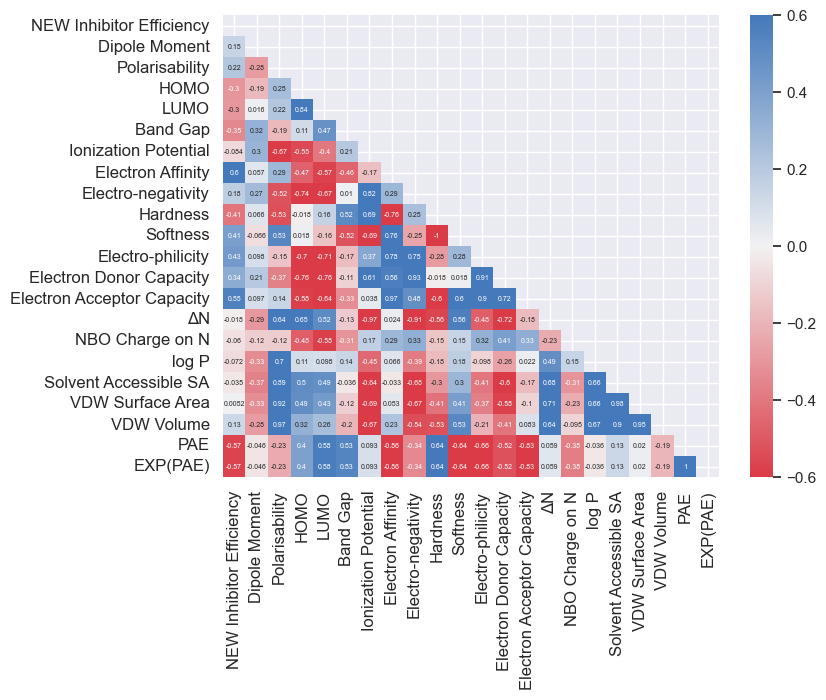

In [11]:
# Get the correlation matrix
correlation_df = data_pyridines_df.iloc[:, 4:].corr(method='spearman')  # 4 from the data (first three are labels)
CorrosionVisualizer.correlation_heatmap(correlation_df)

In [14]:
# Get X
_x_df: DataFrame = data_pyridines_df.iloc[:, 3:].drop(
    columns=["PAE", "EXP(PAE)", "Inhibitor Efficiency", "NEW Inhibitor Efficiency"],
    errors="ignore"
)
_x: ndarray = _x_df.values
_x_labels: List[str] = list(_x_df.columns)

# Number of compounds & features
m: int
n: int
m, n = _x.shape

# Get Y
_ys_df: DataFrame = data_pyridines_df[["PAE", "Inhibitor Efficiency"]]
_y_theoretical: ndarray = data_pyridines_df["PAE"]
_y_experimenmmtal: ndarray = data_pyridines_df["Inhibitor Efficiency"]

In [15]:
display(_x_df.head())

,Dipole Moment,Polarisability,HOMO,LUMO,Band Gap,Ionization Potential,Electron Affinity,Electro-negativity,Hardness,Softness,Electro-philicity,Electron Donor Capacity,Electron Acceptor Capacity,ΔN,NBO Charge on N,log P,Solvent Accessible SA,VDW Surface Area,VDW Volume
0,4.95954,103.5460,-5.12907,-1.13634,3.99273,7.717458,-0.235455,3.741001,3.976457,0.251480,1.759744,4.127302,0.386300,0.409787,-0.47403,0.86,321.40,213.42,125.37
1,1.97838,106.4510,-5.68337,-1.56220,4.12117,9.515954,-0.388703,4.563625,4.952329,0.201925,2.102716,5.003569,0.439944,0.245983,-0.47866,1.53,377.30,226.52,129.41
2,1.45240,91.8567,-5.75385,-1.70615,4.04770,8.731453,-1.628608,3.551423,5.180031,0.193049,1.217425,3.640641,0.089218,0.332872,-0.47357,1.02,333.10,193.85,112.57
3,3.43852,82.8424,-5.88990,-1.49200,4.39790,10.547640,-2.092577,4.227531,6.320109,0.158225,1.413901,4.317681,0.090149,0.219337,-0.45851,0.60,303.79,175.45,104.77
4,2.87919,77.0511,-5.87194,-1.74452,4.12742,9.185709,-0.401187,4.392261,4.793448,0.208618,2.012325,4.807637,0.415376,0.272011,-0.44142,1.27,281.94,160.69,95.82


In [16]:
display(_ys_df.head())

,PAE,Inhibitor Efficiency
0,-2.663340,0.410
1,-2.561180,0.210
2,-2.522240,0.133
3,-2.251314,0.144
4,-2.588964,0.119


# Approaches

1. PCA Analysis to determine which features are relevant?
2. Predict only the computational adsorption energy
3. Co-train the computational & experimental adsorption energies
4. Use both linear and non-linear models (ANN? RFs?)
5. General approach:
   - Train/Test Split (Holdout set)
   - Cross-validation
   - Grid search to optimize the hyper-parameters
   - Validate by analysing the metrics, applicability domain
   - Stack of multiple regressors?

# Train/Test Split

In [17]:
BT_RATIO: float = 0.2
RANDOM_SEED: int = 12345

In [18]:
_x_train, _x_bt, _y_theoretical_train, _y_theoretical_bt, _y_exp_train, _y_exp_bt = train_test_split(
    _x, 
    _y_theoretical,
    _y_experimenmmtal,
    test_size=BT_RATIO,
    random_state=RANDOM_SEED
)

In [19]:
# Display shapes for confirmation
display(_x_train.shape)
display(_x_bt.shape)
display(_y_theoretical_train.shape)
display(_y_theoretical_bt.shape)
display(_y_exp_train.shape)
display(_y_exp_bt.shape)

(21, 19)

(6, 19)

(21,)

(6,)

(21,)

(6,)

# Model 1. PCA-Ridge (Theoretical Model)

### Model Training

In [20]:
param_grid = {
    "n_components": range(2, 8),
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [21]:
_pca_ridge_theoretical: GridSearchCV = get_pca_ridge_model(
    param_grid=param_grid,
    cv=LeaveOneOut()
)

In [22]:
_pca_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 21 folds for each of 54 candidates, totalling 1134 fits
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05, n_components=2; total time=   0.0s
[CV] END ........................alpha=1e-05,

GridSearchCV(cv=LeaveOneOut(), estimator=PcaRidge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100],
                         'n_components': range(2, 8)},
             scoring='neg_root_mean_squared_error', verbose=2)

In [23]:
print(
    f"Optimal parameters for theoretical model: "
    f"n(PCs) = {_pca_ridge_theoretical.best_estimator_.n_components}; "
    f"alpha = {_pca_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_pca_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: n(PCs) = 7; alpha = 10; RMSECV = 0.21794366312651928.


### Model Analysis

In [24]:
_y_theoretical_train_hat: ndarray = _pca_ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat: ndarray = _pca_ridge_theoretical.predict(_x_bt).ravel()

### Metrics & Visuals

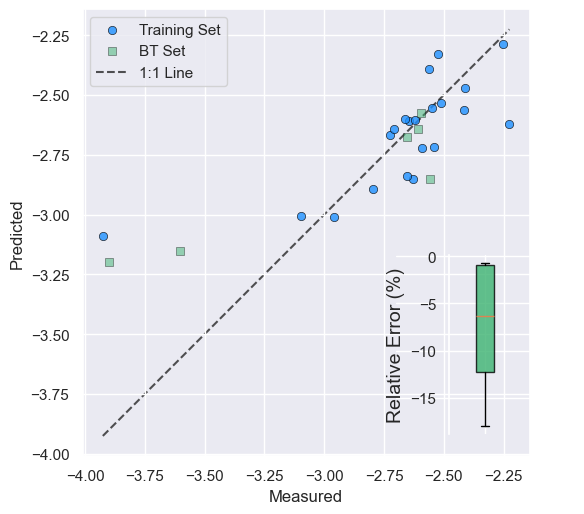

In [25]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

In [26]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.230699
RMSE(BT),0.361056


### Applicability Domain

In [27]:
(
    hat_star,
    hat_train, hat_validation, hat_bt,
    res_scaled_train, res_scaled_validation, res_scaled_bt
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

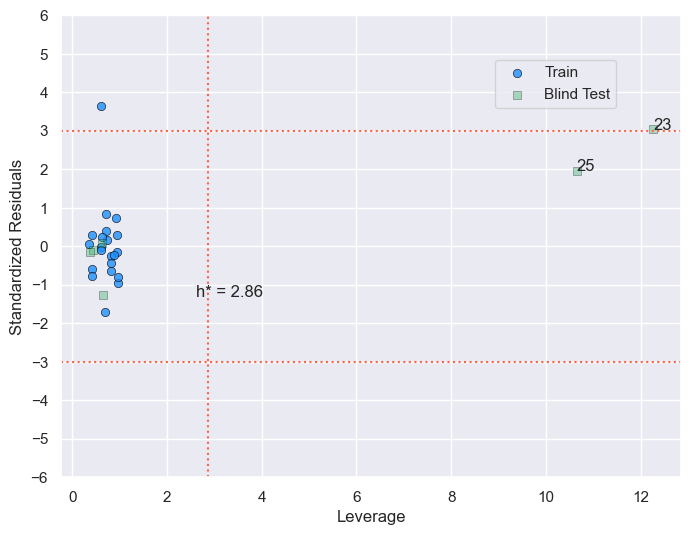

In [28]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star,
    hat_train=hat_train,
    res_scaled_train=res_scaled_train,
    hat_bt=hat_bt,
    res_scaled_bt=res_scaled_bt
)

# Model 2. Ridge (Theoretical Model)

### Model Training

In [29]:
param_grid = {
    "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100]
}

In [30]:
_ridge_theoretical: GridSearchCV = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    n_jobs=1,
    cv=LeaveOneOut()
)

In [31]:
_ridge_theoretical.fit(_x_train, _y_theoretical_train)

Fitting 21 folds for each of 9 candidates, totalling 189 fits
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ........................................alpha=1e-05; total time=   0.0s
[CV] END ......................................

GridSearchCV(cv=LeaveOneOut(), estimator=Ridge(), n_jobs=1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [32]:
print(
    f"Optimal parameters for theoretical model: "
    f"alpha = {_ridge_theoretical.best_estimator_.alpha}; "
    f"RMSECV = {-_ridge_theoretical.best_score_}."
)

Optimal parameters for theoretical model: alpha = 10; RMSECV = 0.20652189264453064.


### Model Analysis

In [33]:
_y_theoretical_train_hat: ndarray = _ridge_theoretical.predict(_x_train).ravel()
_y_theoretical_bt_hat: ndarray = _ridge_theoretical.predict(_x_bt).ravel()

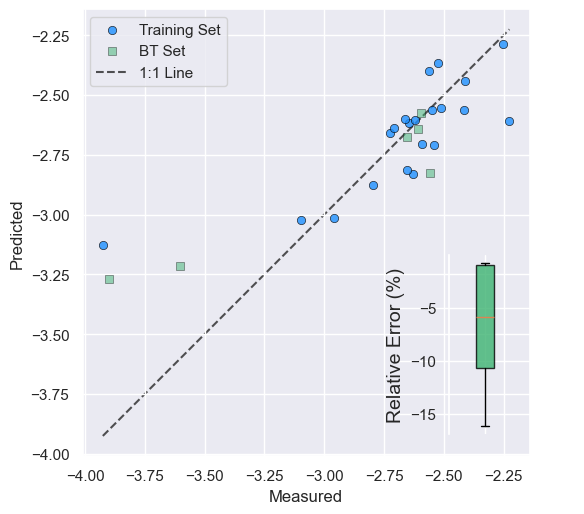

In [34]:
CorrosionVisualizer.predictive_ability_plot(
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

In [35]:
_pca_ridge_metrics: Dict[str, Any] = {
    "RMSE(train)": Metrics.get_metric(
        y=_y_theoretical_train,
        y_hat=_y_theoretical_train_hat,
        metric_type=MetricType.RMSE
    ),
    "RMSE(BT)": Metrics.get_metric(
        y=_y_theoretical_bt,
        y_hat=_y_theoretical_bt_hat,
        metric_type=MetricType.RMSE
    )
}
_pca_ridge_metrics_df: DataFrame = pd.DataFrame.from_dict(
    _pca_ridge_metrics,
    orient="index"
)
display(_pca_ridge_metrics_df)

,0
RMSE(train),0.217922
RMSE(BT),0.321982


### Applicability Domain

In [36]:
(
    hat_star,
    hat_train, hat_validation, hat_bt,
    res_scaled_train, res_scaled_validation, res_scaled_bt
) = ApplicabilityDomain.calculate(
    x_train=_x_train,
    y_train=_y_theoretical_train,
    y_train_hat=_y_theoretical_train_hat,
    x_bt=_x_bt,
    y_bt=_y_theoretical_bt,
    y_bt_hat=_y_theoretical_bt_hat
)

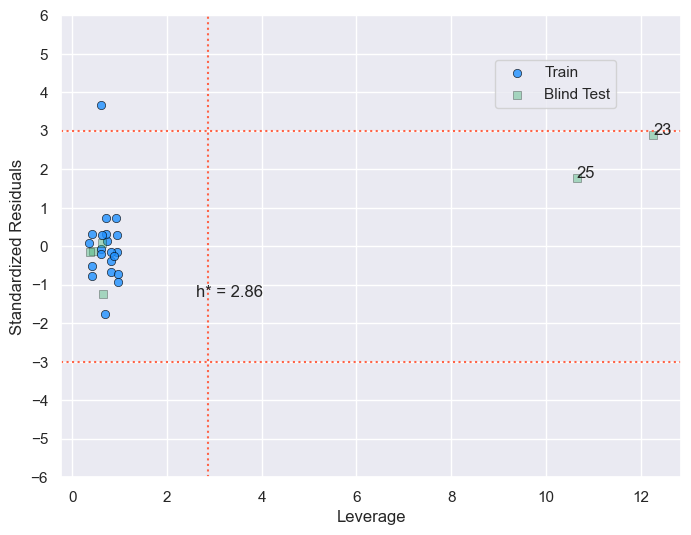

In [37]:
CorrosionVisualizer.applicability_domain_plot(
    hat_star=hat_star,
    hat_train=hat_train,
    res_scaled_train=res_scaled_train,
    hat_bt=hat_bt,
    res_scaled_bt=res_scaled_bt
)

In [38]:
data_df.loc[32, :]

ID                                   gp_0039
Name                            isoquinoline
SMILES                        c1ccc2cnccc2c1
Inhibitor Efficiency                   0.642
NEW Inhibitor Efficiency            1.887598
Dipole Moment                        1.57908
Polarisability                       155.449
HOMO                               -5.696707
LUMO                               -2.445761
Band Gap                            3.250946
Ionization Potential                8.005927
Electron Affinity                   0.199169
Electro-negativity                  4.102548
Hardness                            3.903379
Softness                            0.256188
Electro-philicity                    2.15594
Electron Donor Capacity             4.695136
Electron Acceptor Capacity          0.592588
ΔN                                  0.371147
NBO Charge on N                      -0.4391
log P                                   3.38
Solvent Accessible SA                 377.63
VDW Surfac

In [39]:
data_df.loc[21, :]

ID                                        gp_0038
Name                          2-isopropylpyridine
SMILES                              CC(C)c1ccccn1
Inhibitor Efficiency                        0.078
NEW Inhibitor Efficiency                 1.215894
Dipole Moment                             1.80296
Polarisability                            103.381
HOMO                                    -5.839839
LUMO                                    -1.792687
Band Gap                                 4.047152
Ionization Potential                      8.86109
Electron Affinity                       -0.654833
Electro-negativity                       4.103129
Hardness                                 4.757961
Softness                                 0.210174
Electro-philicity                         1.76921
Electron Donor Capacity                  4.415519
Electron Acceptor Capacity               0.312391
ΔN                                       0.304424
NBO Charge on N                          -0.45663
